# Dissertation Part 1: Data Preprocessing

## Taking a First Look at The Data

In [1]:
# Loading in standard packages
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(r"/content/Ship_Performance_Dataset.csv")

In [ ]:
# Examining first 10 rows of the dataset
df.head(10)

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
5,2023-07-09,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),Fair,18.616196,2171.646567,723.304215,14.916320,Rough,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898
6,2023-07-16,Fish Carrier,Transoceanic,Heavy Fuel Oil (HFO),Critical,20.433119,2505.043509,270.118588,8.455264,Rough,1191.436412,434449.263514,739431.825390,29.040420,1.120389,0.602932,3,58.508635
7,2023-07-23,Container Ship,Short-haul,Diesel,Critical,23.498048,814.806452,1717.328413,9.283780,Moderate,318.449265,348380.608232,462211.402199,52.478600,0.695975,1.408663,6,94.591972
8,2023-07-30,NaN,Coastal,Heavy Fuel Oil (HFO),Good,17.309362,1179.018805,429.564313,6.002358,Moderate,1953.447929,346071.519942,448682.864128,14.451820,0.977448,0.764914,8,50.247060
9,2023-08-06,Container Ship,Long-haul,Diesel,Fair,23.227101,2685.401654,1588.792282,11.721261,Calm,1843.438252,149790.209291,615230.857491,63.742761,0.440676,1.435569,2,79.451330


In [2]:
# Understanding data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [4]:
# Checking for missing values in the dataset
print(df.isnull().mean() * 100)

Date                       0.00000
Ship_Type                  4.97076
Route_Type                 4.97076
Engine_Type                4.97076
Maintenance_Status         4.97076
Speed_Over_Ground_knots    0.00000
Engine_Power_kW            0.00000
Distance_Traveled_nm       0.00000
Draft_meters               0.00000
Weather_Condition          4.97076
Cargo_Weight_tons          0.00000
Operational_Cost_USD       0.00000
Revenue_per_Voyage_USD     0.00000
Turnaround_Time_hours      0.00000
Efficiency_nm_per_kWh      0.00000
Seasonal_Impact_Score      0.00000
Weekly_Voyage_Count        0.00000
Average_Load_Percentage    0.00000
dtype: float64


### Testing for Missing Completely at Random (MCAR)

Source:

https://ishanjainoffical.medium.com/types-of-missing-values-in-data-059943a88339#:~:text=Missing%20Completely%20at%20Random%20(MCAR)%3A&text=Identification%3A%20To%20identify%20MCAR%2C%20you,other%20variables%20in%20the%20dataset.

If data is purely MCAR,
- For clustering, MCAR missingness has no patterns. Therefore, clustering might not reveal meaningful clusters (just random noise)
- For correlation, missingness will not correlate with other variables, so correlation matrices will show no structure.

In [ ]:
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('/content/Ship_Performance_Dataset.csv')

# Identifying column with missing values
missing_cols = [col for col in df.columns if df[col].isnull().any()]

# Creating missingness indicator
for col in missing_cols:
    df[f'{col}_missing'] = df[col].isnull().astype(int)

# Perform chi-squared tests
results = []
for i in range(len(missing_cols)):
    for j in range(i+1, len(missing_cols)):
        col1 = missing_cols[i]
        col2 = missing_cols[j]

        # Contingency table
        contingency_table = pd.crosstab(
            df[f'{col1}_missing'],
            df[f'{col2}_missing']
        )

        chi2, p, _, _ = chi2_contingency(contingency_table)

        results.append({
            'Column 1': col1,
            'Column 2': col2,
            'Chi-Square': chi2,
            'p-value': p,
            'Conclusion': 'Reject MCAR' if p < 0.05 else 'Not reject MCAR'
        })

results_df = pd.DataFrame(results)

results_df

,Column 1,Column 2,Chi-Square,p-value,Conclusion
0,Ship_Type,Route_Type,0.4958,0.4814,Not reject MCAR
1,Ship_Type,Engine_Type,0.0896,0.7646,Not reject MCAR
2,Ship_Type,Maintenance_Status,0.0000,1.0000,Not reject MCAR
3,Ship_Type,Weather_Condition,0.0111,0.9161,Not reject MCAR
4,Route_Type,Engine_Type,1.2296,0.2675,Not reject MCAR
5,Route_Type,Maintenance_Status,0.0000,1.0000,Not reject MCAR
6,Route_Type,Weather_Condition,0.2602,0.6100,Not reject MCAR
7,Engine_Type,Maintenance_Status,0.0896,0.7646,Not reject MCAR
8,Engine_Type,Weather_Condition,0.2602,0.6100,Not reject MCAR
9,Maintenance_Status,Weather_Condition,0.4958,0.4814,Not reject MCAR


### Artificially Generating Missing at Random (MAR) and Missing Not at Random (MNAR)

- So that patterns of missing values can be seen, MCAR would not generate any meaningful cluster patterns
- To have controlled amount of missing values


MAR: Missing values depend on another observed variables

MNAR: Missing values depend on the variable itself

In [ ]:
# Creating a copy of the original dataset
ship_missing = df.copy()

# Introducing MAR where Cargo_Weight_Tons is missing for specific Ship_Type
mar_mask = ship_missing["Ship_Type"].isin(["Cargo", "Tanker"])
ship_missing.loc[mar_mask, "Cargo_Weight_tons"] = np.nan

# Introducing MNAR in Operation_Cost_USD where values are more often missing when it is high
threshold = ship_missing["Operational_Cost_USD"].quantile(0.75)  # Upper 25% missing
mnar_mask = ship_missing["Operational_Cost_USD"] > threshold
ship_missing.loc[mnar_mask, "Operational_Cost_USD"] = np.nan

# Looking at introduced MAR and MNAR
missing_summary_after = ship_missing.isnull().sum()

missing_summary_after

### Saving the new dataset

In [ ]:
ship_missing.to_csv("Ship_Dataset_with_MAR_and_MNAR_Missingness.csv", index=False)

### Logistic Regression to detect Missing at Random (MAR)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# Load new dataset
df = pd.read_csv("/content/Ship_Dataset_with_MAR_and_MNAR_Missingness.csv")

# Choose Cargo_Weight_tons as target column as from previous implementation
target = 'Cargo_Weight_tons'
df['missing'] = df[target].isnull().astype(int)

# Choose Ship_Type as predictor
predictor_cols = ['Ship_Type']
df_predict = df[predictor_cols + ['missing']].dropna()

# One-hot encode Ship_Type (due to it being a categorical variable)
X = pd.get_dummies(df_predict[predictor_cols], drop_first=True)
y = df_predict['missing']

# Fit the logistic regresssion
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Check coefficients
coefficients = model.coef_

if coefficients[0][0] != 0 or coefficients[0][1] != 0:
    print("MAR hypothesis rejected")
else:
    print("MAR hypothesis not rejected")


MAR hypothesis rejected


## Dissertation Part 2: Visual Analysis of Missing Patterns in Data Through Clustering and Correlation

- Clustering methods explored:
  - Hierarchical Clustering
  - DBSCAN Clustering
  - K-Means Clustering
  - Self Organizing Map (SOM)

In [102]:
# Loading in standard packages for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import seaborn as sns

# Load new dataset
df = pd.read_csv(r"/content/Ship_Dataset_with_MAR_and_MNAR_Missingness.csv")

Converting to binary matrix
- Things to consider:
  - Does it facilitate loss of any important information? (If yes, does it matter? Would it affect analysis?)
  - When converting to binary matrix, how does it differ from previous implementation by Wang where they use data classification?

In [2]:
# Convert missing values into a binary matrix
binary_missing = df.isnull().astype(int)

In [ ]:
# Display the first 10 rows of the binary matrix dataset
binary_missing.head(10)

## Hierarchical Clustering

Source:

1) https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/#h-what-is-hierarchical-clustering


### Feature-level missingness pattern Dendrogram

<Axes: >

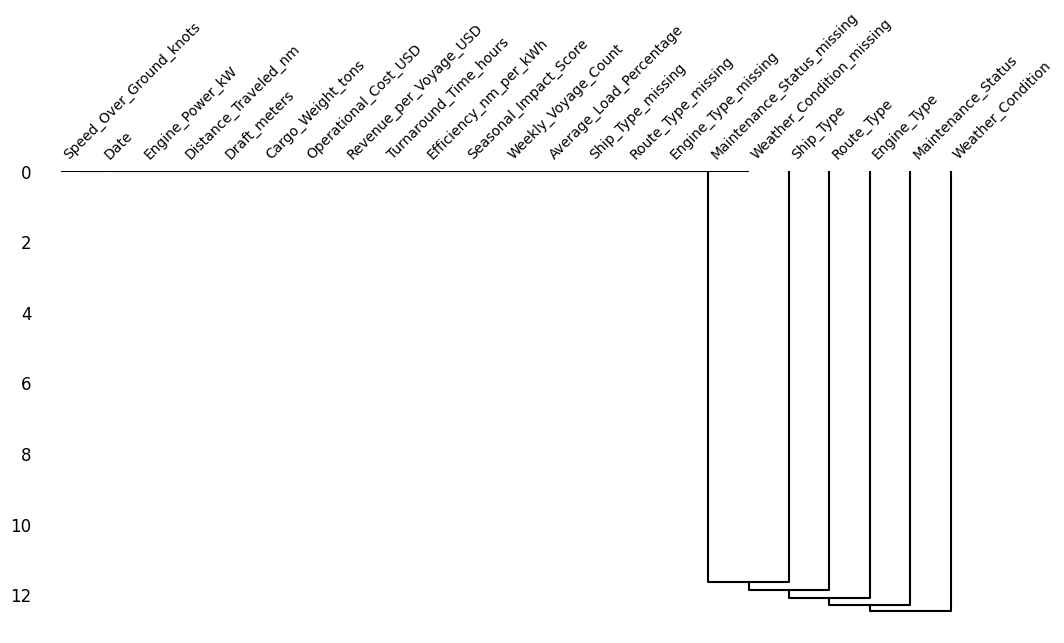

In [ ]:
import missingno as msno

msno.dendrogram(df, figsize=(12, 6), fontsize=10)

In [103]:
from scipy.cluster.hierarchy import linkage

# Hierarchical clustering on binary dataset
Z = linkage(binary_missing, method='ward')

- Another thing to consider is to use a distance metric Jaccard. This is suitable for binary matrix.

### Row-level missingness patterns Dendrogram

- We choose the number of clusters through visualizing missing values through a dendrogram. The dendrogram visualizes hierarchical clustering but does not actually assign cluster labels to the observations.

- We cut the dendrogram at an appropriate height (cuts the tallest vertical line before they merge) to find the number of clusters.


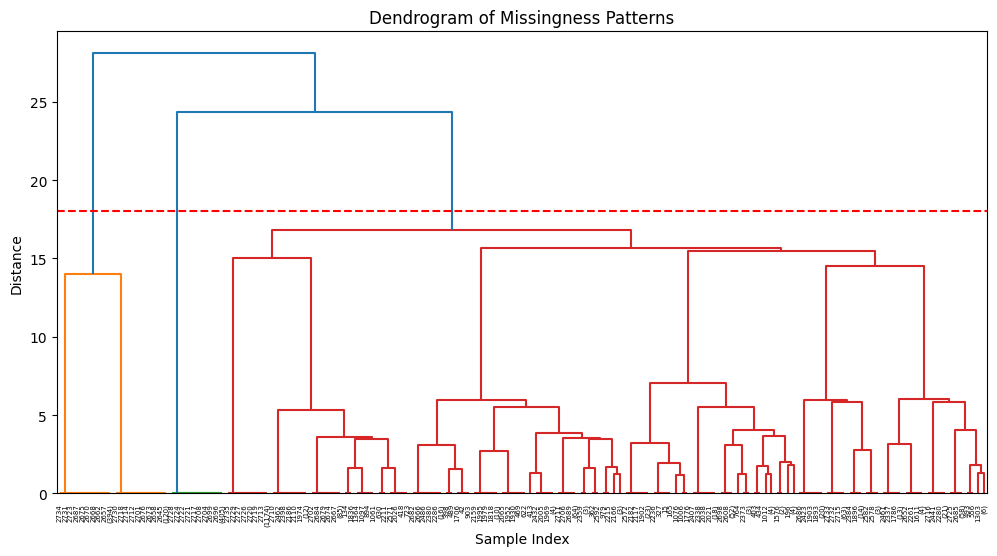

In [104]:
from scipy.cluster.hierarchy import dendrogram

# Plotting the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=10)
plt.title("Dendrogram of Missingness Patterns")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.axhline(y=18, color='r', linestyle='--')
plt.show()

What can we tell from this dendrogram visualization?
- Shows relationships between missingness patterns whereby missing values that have similar profiles will be grouped together.
- Can see which variable contribute to missing patterns by examining clusters...?

In [5]:
from scipy.cluster.hierarchy import fcluster

# Setting cut-off threshold
cut_off = 18

num_clusters = fcluster(Z, cut_off, criterion="distance")

print(f"Number of clusters: {len(np.unique(num_clusters))}")

Number of clusters: 3


- Below perform hierarchical clustering that actually assigns cluster label to each observation (row).
- This is necessary because the dendrogram alone does not provide clusters, it only shows potential cluster structures.
- Instead of analyzing a complex tree structure, we assign each row (observation) into one of 7 missingness-based clusters and then analyze their patterns systematically.

cluster_summary
- Instead of analyzing missingness across the entire dataset, we now compare clusters separately.

In [105]:
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering with clusters from cut-off point
num_clusters = 3
hc = AgglomerativeClustering(n_clusters=num_clusters, linkage="ward")
cluster_labels = hc.fit_predict(binary_missing)

# Add the cluster labels to the dataset
df['Hierarchical_Cluster'] = cluster_labels

In [106]:
# Summarizing amount of missing values per cluster
cluster_summary = df.groupby("Hierarchical_Cluster").apply(lambda x: x.isnull().sum())


#Filter for only columns that contains missing values
missing_cols = df.columns[df.isnull().any()]
cluster_missing = cluster_summary[missing_cols]

cluster_missing

<ipython-input-106-9c7c42aff0ae>:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD
Hierarchical_Cluster,,,,,,,
0,136,136,136,136,136,111,141
1,0,0,0,0,0,532,129
2,0,0,0,0,0,0,414


### Visualizing Missingness Rate per Cluster

<ipython-input-107-459875cb7f3c>:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



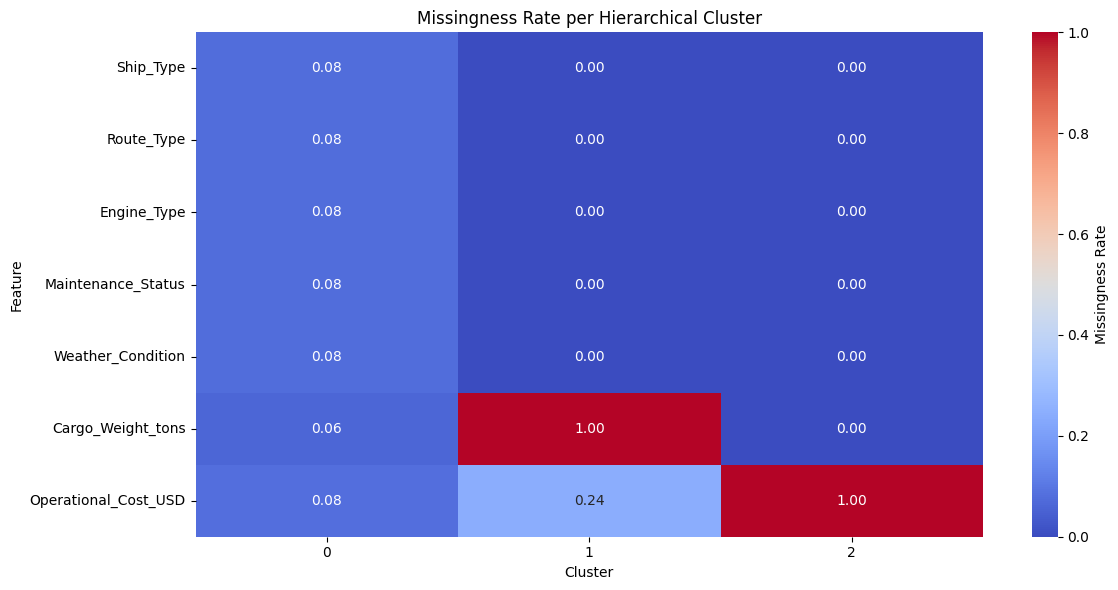

In [107]:
# Calculate missingness rate per cluster
hierarchical_missingness_rates = df.groupby('Hierarchical_Cluster').apply(lambda x: x.isnull().mean())

# Filter for columns with missing values
missing_cols = df.columns[df.isnull().any()]
hierarchical_missingness_rates = hierarchical_missingness_rates[missing_cols]

# Visualize missingness rates using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hierarchical_missingness_rates.T, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Missingness Rate'})
plt.title('Missingness Rate per Hierarchical Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Visualizing Missing Data Patterns with Hierarchical Clustering

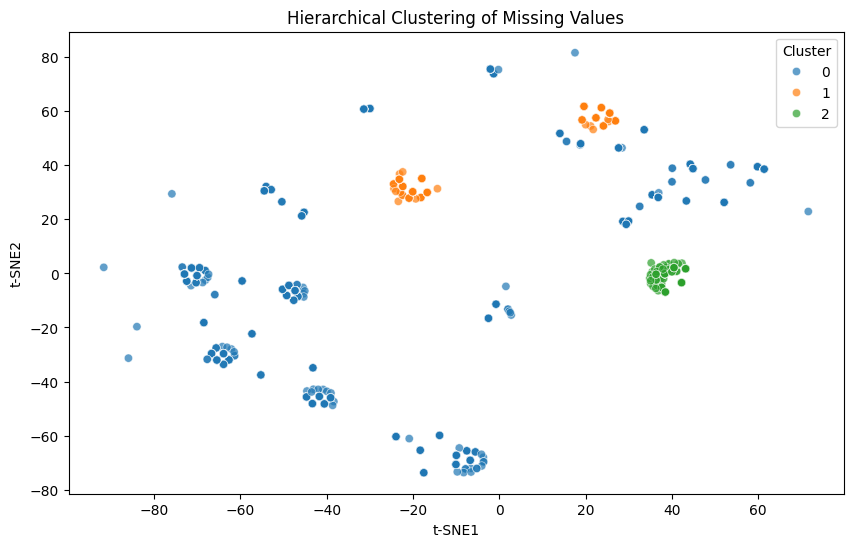

In [108]:
from sklearn.manifold import TSNE

# Visualizing missing values using TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(binary_missing)

tsne_df_hierarchical = pd.DataFrame(tsne_results, columns=["tSNE1", "tSNE2"])
tsne_df_hierarchical["Hierarchical_Cluster"] = cluster_labels

# Creating scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="tSNE1", y="tSNE2", hue="Hierarchical_Cluster", data=tsne_df_hierarchical, palette="tab10", alpha=0.7)
plt.title("Hierarchical Clustering of Missing Values")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend(title="Cluster")
plt.show()

### Interactive Visualization of Missing Data Patterns

- Source:
  - https://plotly.com/python/legend/
  - https://www.analyticsvidhya.com/blog/2021/10/interactive-plots-in-python-with-plotly-a-complete-guide/
  - https://plotly.com/python/t-sne-and-umap-projections/

In [14]:
import plotly.express as px

# Visualizing missing values using TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(binary_missing)

# Convert the cluster cluster labels to string and sorting into ascending order
cluster_labels_str = cluster_labels.astype(int).astype(str)
sorted_clusters = sorted(tsne_df_hierarchical["Hierarchical_Cluster"].unique(), key=lambda x: int(x))

# Matching the cluster colors with the static TSNE visualization
tab10_colors = sns.color_palette("tab10").as_hex()
color_map = {str(cluster): tab10_colors[i % len(tab10_colors)]
             for i, cluster in enumerate(sorted_clusters)}

tsne_df_hierarchical = pd.DataFrame(tsne_results, columns=["tSNE1", "tSNE2"])
tsne_df_hierarchical["Hierarchical_Cluster"] = cluster_labels_str

# Creating the interactive scatter plot
fig = px.scatter(
    tsne_df_hierarchical,
    x="tSNE1",
    y="tSNE2",
    color="Hierarchical_Cluster",
    title="Hierarchical Clustering of Missing Values",
    labels={"Hierarchical_Cluster": "Cluster"},
    hover_name="Hierarchical_Cluster",
    color_discrete_map=color_map,
    category_orders={"Hierarchical_Cluster": sorted_clusters}
)

fig.update_layout(
    legend_title_text='Cluster',
    hovermode='closest',
    xaxis_title='t-SNE1',
    yaxis_title='t-SNE2',
    width=800,
    height=600,
)

fig.update_traces(
    marker=dict(size=8, opacity=0.8),
    selector=dict(mode='markers')
)

fig.show()

### Visualizing Correlation of Missingness Patterns Across Clusters

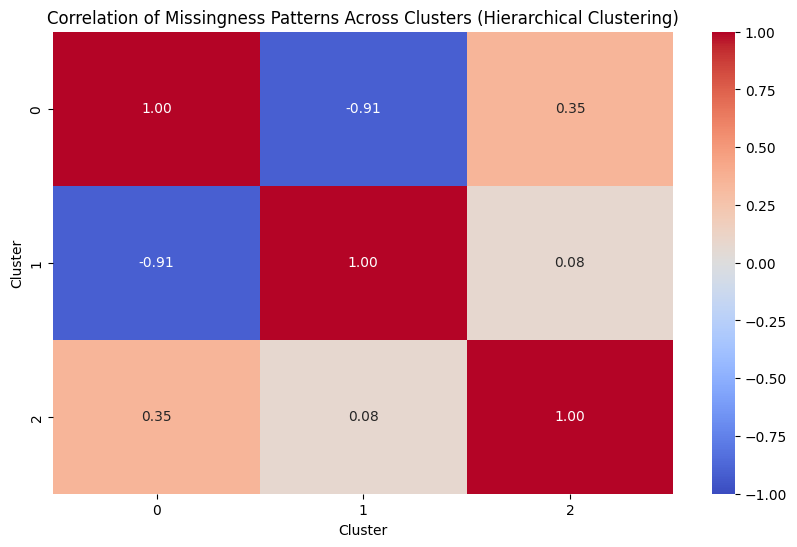

In [32]:
# Correlation between clusters
cluster_missingness_corr = hierarchical_missingness_rates.T.corr()

# Plot the heatmap of correlation of missingness across clusters
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_missingness_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation of Missingness Patterns Across Clusters (Hierarchical Clustering)')
plt.xlabel("Cluster")
plt.ylabel("Cluster")
plt.show()

## Density Based Spatial Clustering of Applications with Noise (DBSCAN) Clustering

- Two parematers that needs to be known
  - Radius of neighborhoods for a given data point p (denoted as epsilon)
  - The min number of data points in a given e-neighborhood to form clusters (denoted as minPts)
    - Points that do not meet this criterion are classified as noise / outliers



Source:

1) https://www.reneshbedre.com/blog/dbscan-python.html

2) https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/



### Finding optimal Epsilon value using K-Distance Plot

Method: Temporary Imputation
- Missing values are temporarily imputed using a simple and straightforward imputation technique (mean)
- This is done to ONLY determine eps, will not be used for DBSCAN clustering
- The point where there is the maximum curvature will be chosen as the elbow value.


Source:

1) https://medium.com/leukemiaairesearch/dbscan-and-gaussian-mixtures-with-gene-expression-data-87d1c7cddb59


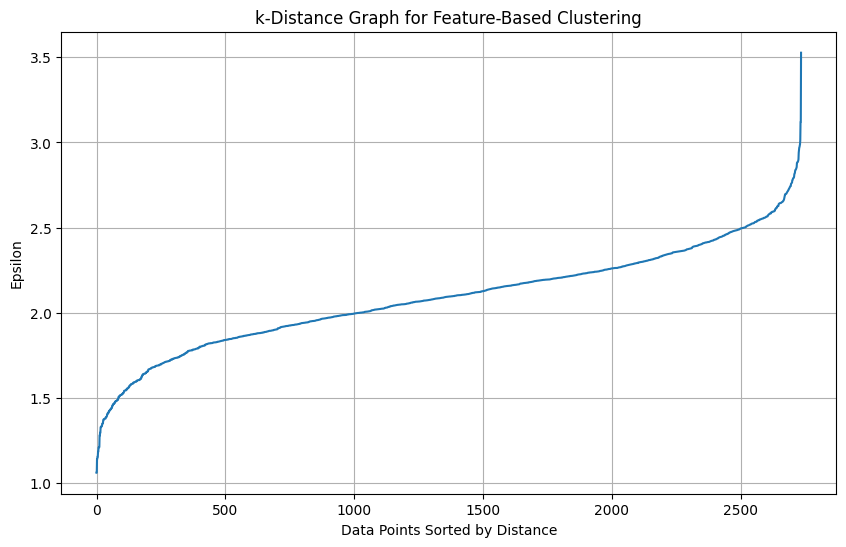

In [112]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Selecting only numerical features (since missing values in dataset are numerical)
numeric_features = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_features]

# Temporarily imputing missing values with mean (for distance calculation only)
df_imputed = df_numeric.copy().fillna(df_numeric.mean())

# Standardize dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Finding optimal eps using k-distance graph
neighbors = NearestNeighbors(n_neighbors=34)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

sorted_distances = np.sort(distances[:,1])

# Plotting k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.title('k-Distance Graph for Feature-Based Clustering')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('Epsilon')
plt.grid()
plt.show()


### Overview of Missing Data Clusters with DBSCAN

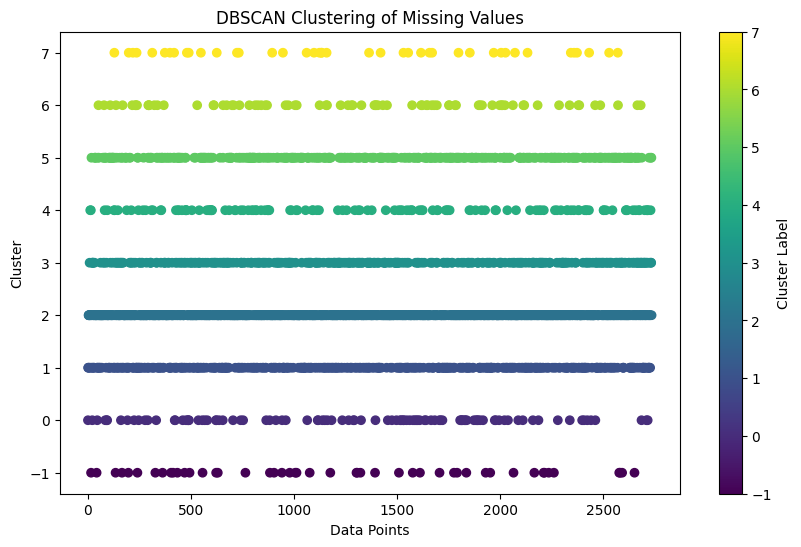

In [113]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances

# Convert dataset into binary matrix
binary_missing = df.isnull().astype(int)

# Computing pairwise Hamming distances (since data is binary)
hamming_distances = pairwise_distances(binary_missing, metric="hamming")

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=2.4, min_samples=34)
clusters = dbscan.fit_predict(hamming_distances)

# Add the cluster labels to the original dataset
df['DBSCAN_Cluster'] = clusters

# Visualize the clusters of missing values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df)), df['DBSCAN_Cluster'], c=df['DBSCAN_Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering of Missing Values')
plt.xlabel('Data Points')
plt.ylabel('Cluster')
plt.colorbar(label='Cluster Label')
plt.show()

In [114]:
# Summarising amount of missing values per cluster
cluster_summary = df.groupby("DBSCAN_Cluster").apply(lambda x: x.isnull().sum())

# Filter for only columns that contain missing values
missing_cols = df.columns[df.isnull().any()]
cluster_missing = cluster_summary[missing_cols]

cluster_missing

<ipython-input-114-cc30d881e5b3>:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD
DBSCAN_Cluster,,,,,,,
-1,9,18,17,19,14,31,39
0,18,14,22,24,24,0,102
1,0,0,0,0,0,0,414
2,0,0,0,0,0,0,0
3,90,67,54,60,66,0,0
4,0,0,0,0,0,129,129
5,0,0,0,0,0,403,0
6,0,21,27,16,16,80,0
7,19,16,16,17,16,0,0


### Visualizing Missingness Rate per Cluster

<ipython-input-115-038b4817e7c3>:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



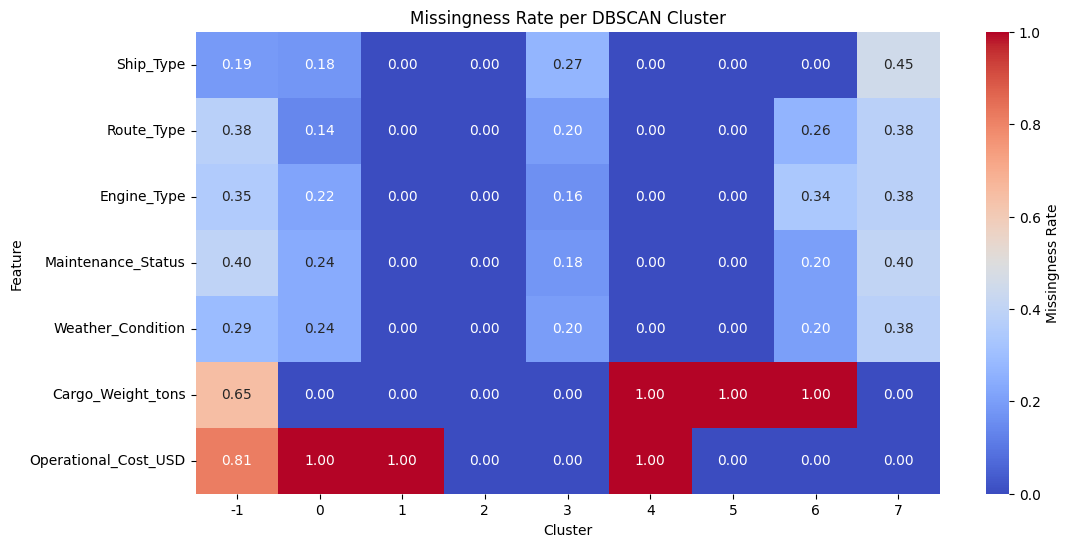

In [115]:
# Calculating missingness rate per cluster
dbscan_missingness_rates = df.groupby('DBSCAN_Cluster').apply(lambda x: x.isnull().mean())

# Filter for columns with missing values
missing_cols = df.columns[df.isnull().any()]
dbscan_missingness_rates = dbscan_missingness_rates[missing_cols]

# Visualize missingness rates using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(dbscan_missingness_rates.T, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Missingness Rate'})
plt.title('Missingness Rate per DBSCAN Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

### Visualizing Missing Data Patterns with DBSCAN

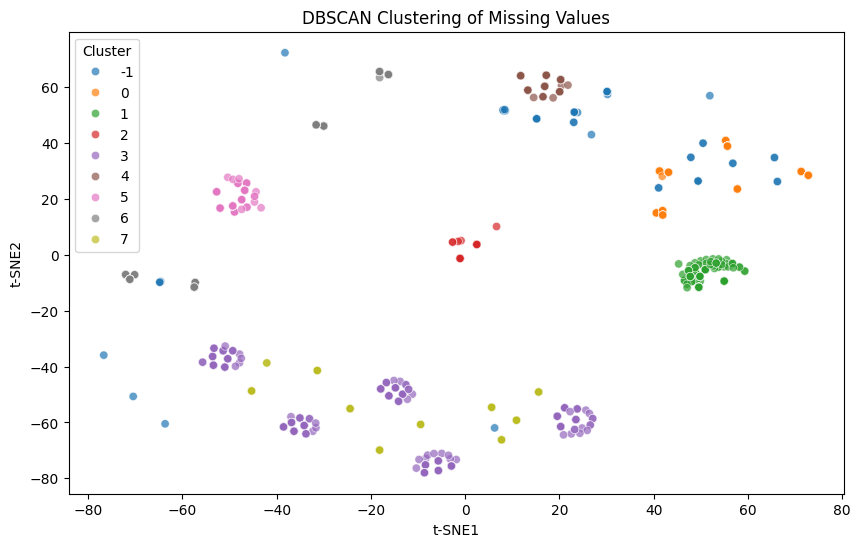

In [116]:
from sklearn.manifold import TSNE
import seaborn as sns

# Visualizing missing values using TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(binary_missing)

tsne_df_dbscan = pd.DataFrame(tsne_results, columns=["tSNE1", "tSNE2"])
tsne_df_dbscan["DBSCAN_Cluster"] = clusters

# Creating scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="tSNE1", y="tSNE2", hue="DBSCAN_Cluster", data=tsne_df_dbscan, palette="tab10", alpha=0.7)
plt.title("DBSCAN Clustering of Missing Values")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend(title="Cluster")
plt.show()

### Interactive Visualization of Missing Data Patterns

In [38]:
import plotly.express as px

# Visualizing missing values using TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(binary_missing)

# Convert the cluster cluster labels to string and sorting into ascending order
cluster_labels_str = clusters.astype(int).astype(str)
sorted_clusters = sorted(tsne_df_dbscan["DBSCAN_Cluster"].unique(), key=lambda x: int(x))

# Matching the cluster colors with the static TSNE visualization
tab10_colors = sns.color_palette("tab10").as_hex()
color_map = {str(cluster): tab10_colors[i % len(tab10_colors)]
             for i, cluster in enumerate(sorted_clusters)}

tsne_df_dbscan = pd.DataFrame(tsne_results, columns=["tSNE1", "tSNE2"])
tsne_df_dbscan["DBSCAN_Cluster"] = cluster_labels_str

# Creating interactive scatter plot
fig = px.scatter(
    tsne_df_dbscan,
    x="tSNE1",
    y="tSNE2",
    color="DBSCAN_Cluster",
    title="DBSCAN Clustering of Missing Values",
    labels={"DBSCAN_Cluster": "Cluster"},
    hover_name="DBSCAN_Cluster",
    color_discrete_map=color_map,
    category_orders={"DBSCAN_Cluster": sorted_clusters}
)

fig.update_layout(
    legend_title_text='Cluster',
    hovermode='closest',
    xaxis_title='t-SNE1',
    yaxis_title='t-SNE2',
    width=800,
    height=600,
)

fig.update_traces(
    marker=dict(size=8, opacity=0.8),
    selector=dict(mode='markers')
)

fig.show()

### Visualizing Correlation of Missingness Patterns Across Clusters


Source: https://www.reneshbedre.com/blog/dbscan-python.html

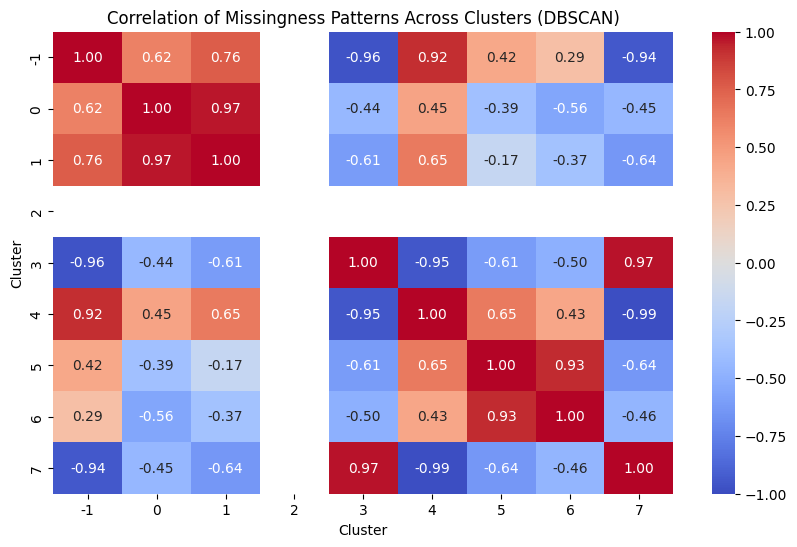

In [39]:
# Correlation between clusters
cluster_missingness_corr = dbscan_missingness_rates.T.corr()

# Plotting the heatmap of correlation of missingess across clusters
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_missingness_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation of Missingness Patterns Across Clusters (DBSCAN)')
plt.xlabel("Cluster")
plt.ylabel("Cluster")
plt.show()

## K-Means Clustering

- Partitioning dataset into a predefined number of clusters
- Optimization plays a crucial role in the k-means clustering algorithm. The goal of the optimization process is to find the best set of centroids that minimizes the sum of squared distances between each data point and its closest centroid.



Sources:

1) https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

2) https://hex.tech/blog/Unveiling-patterns-in-unlabeled-data-with-k-means-clustering/


### Using Elbow Method to Determine the Optimal k Value
  - Plots within-cluster sum of squares (WCSS) against the number of clusters
  - Elbow point is identified where the rate of decrease in WCSS begins to slow down

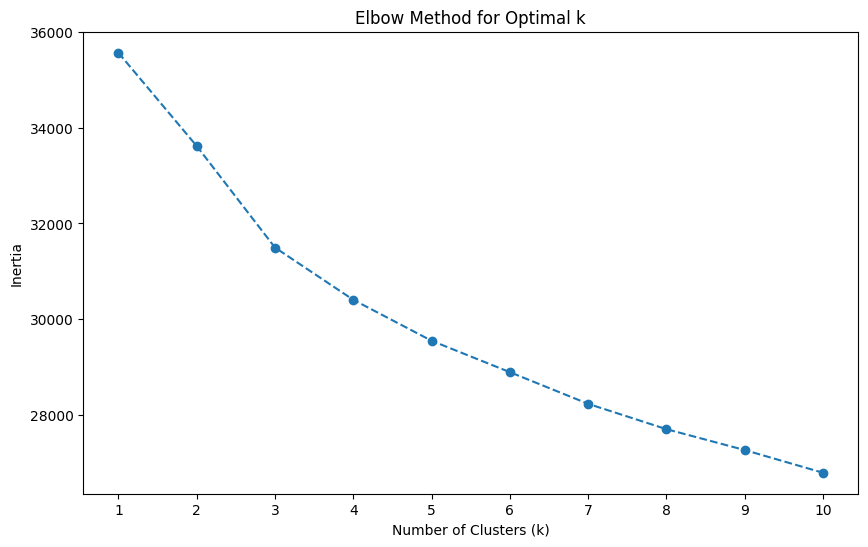

In [40]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Elbow Method
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df_scaled) # Scaled data taken from DBSCAN clustering imputation
    inertias.append(kmeans.inertia_)

# Ploting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()

- Using Silhoutte Score to determine the optimal k value

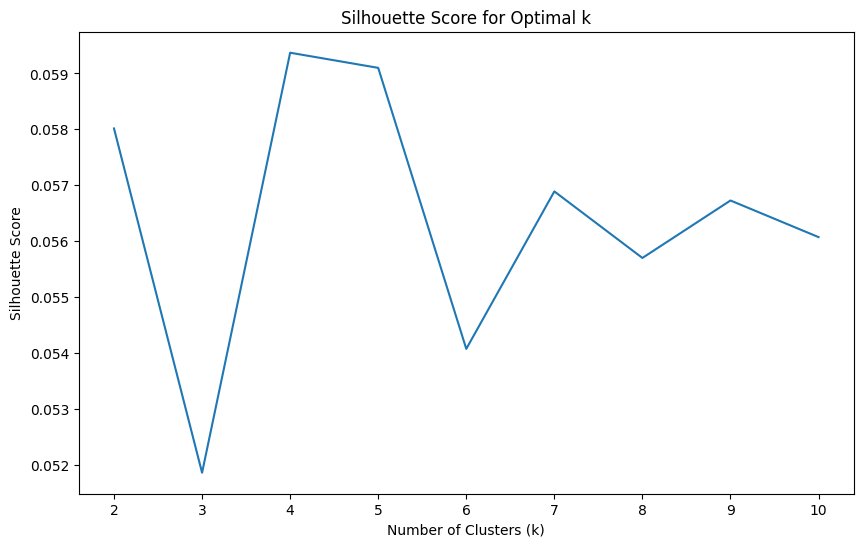

In [ ]:
# Silhouette Score
silhouette_scores = []
k_values = range(2, 11)

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Silhouette Score graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

The silhoutte score here neeeds to be re-run multipe times to get a more reliable assessment. Reasons:

- K-means clustering is a randomized algorithm that can produce different cluster assignments and consequently, different silhoutte scores even with the same data and number of clusters.


However, only one method is needed to determine the optimal k-value (either elbow method or silhoutte scores)

### Overview of Missing Data Clusters with K-Means

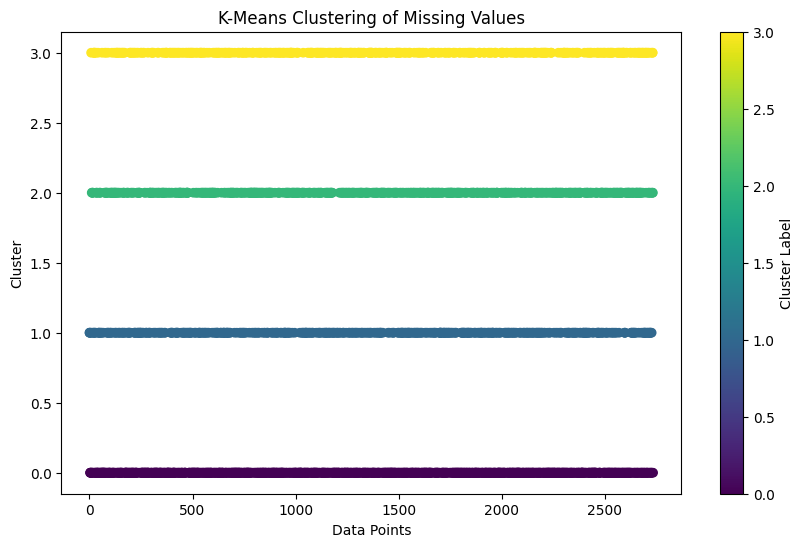

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Convert dataset into binary matrix
binary_missing = df.isnull().astype(int)

# Computing pairwise Hamming distances (since data is binary)
hamming_distances = pairwise_distances(binary_missing, metric="hamming")

# Apply K-Means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
clusters = kmeans.fit_predict(hamming_distances)

# Add the cluster labels to the original dataset
df['KMeans_Cluster'] = clusters

# Visualize the clusters of missing values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df)), df['KMeans_Cluster'], c=df['KMeans_Cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering of Missing Values')
plt.xlabel('Data Points')
plt.ylabel('Cluster')
plt.colorbar(label='Cluster Label')
plt.show()

In [45]:
# Creating a DataFrame to summarize missing values per cluster
cluster_summary = df.groupby("KMeans_Cluster").apply(lambda x: x.isnull().sum())

# Filter for only columns that contains missing values
missing_cols = df.columns[df.isnull().any()]
cluster_missing = cluster_summary[missing_cols]

cluster_missing

<ipython-input-45-300faba8cd41>:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD
KMeans_Cluster,,,,,,,
0,0,0,0,0,0,0,0
1,0,26,31,23,21,633,150
2,18,14,22,24,24,0,516
3,118,96,83,89,91,10,18


### Visualizing Missingness Rate per Cluster

<ipython-input-53-031b023df371>:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



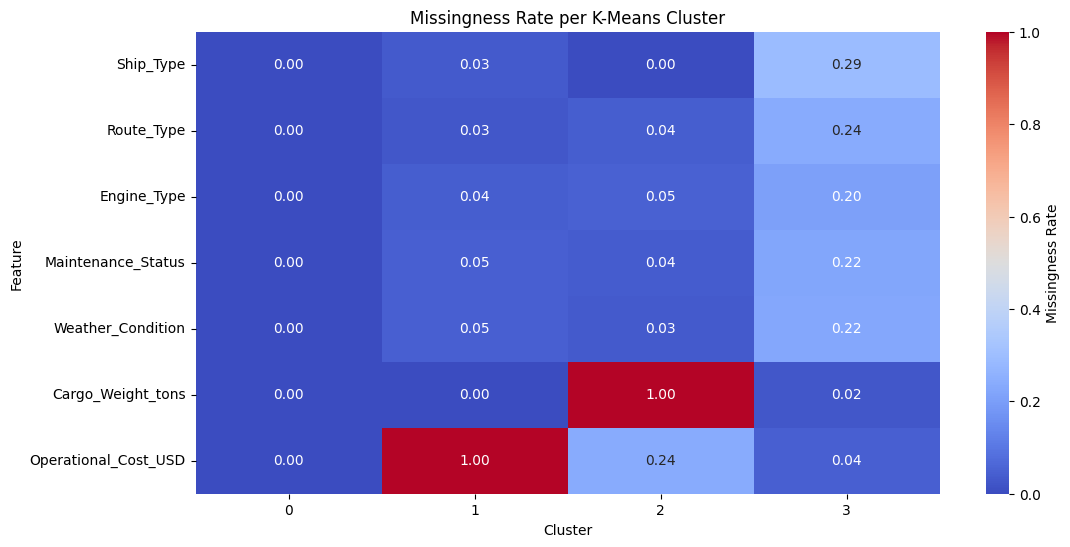

In [53]:
# Calculating missingness rate per cluster
kmeans_missingness_rates = df.groupby('KMeans_Cluster').apply(lambda x: x.isnull().mean())

# Filter for columns with missing values
missing_cols = df.columns[df.isnull().any()]
kmeans_missingness_rates = kmeans_missingness_rates[missing_cols]

# Visualize missingness rates using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(kmeans_missingness_rates.T, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Missingness Rate'})
plt.title('Missingness Rate per K-Means Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

### Visualizing Missing Data Patterns with K-Means

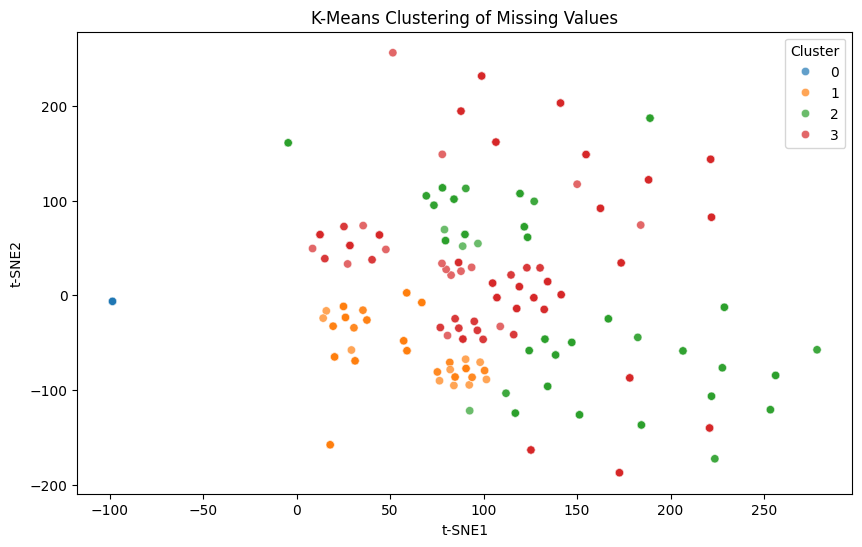

In [98]:
from sklearn.manifold import TSNE

# Visualizing missing values using TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(hamming_distances)

tsne_df_kmeans = pd.DataFrame(tsne_results, columns=["tSNE1", "tSNE2"])
tsne_df_kmeans["KMeans_Cluster"] = clusters

# Creating scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="tSNE1", y="tSNE2", hue="KMeans_Cluster", data=tsne_df_kmeans, palette="tab10", alpha=0.7)
plt.title("K-Means Clustering of Missing Values")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend(title="Cluster")
plt.show()

### Interactive Visualization of Missing Data Patterns

In [54]:
import plotly.express as px

# Visualizing missing values using TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(hamming_distances)

# Convert the cluster cluster labels to string and sorting into ascending order
cluster_labels_str = clusters.astype(int).astype(str)
sorted_clusters = sorted(tsne_df_kmeans["KMeans_Cluster"].unique(), key=lambda x: int(x))

# Matching the cluster colors with the static TSNE visualization
tab10_colors = sns.color_palette("tab10").as_hex()
color_map = {str(cluster): tab10_colors[i % len(tab10_colors)]
             for i, cluster in enumerate(sorted_clusters)}

tsne_df_kmeans = pd.DataFrame(tsne_results, columns=["tSNE1", "tSNE2"])
tsne_df_kmeans["KMeans_Cluster"] = cluster_labels_str

# Creating interactive scatter plot
fig = px.scatter(
    tsne_df_kmeans,
    x="tSNE1",
    y="tSNE2",
    color="KMeans_Cluster",
    title="K-Means Clustering of Missing Values",
    labels={"KMeans_Cluster": "Cluster"},
    hover_name="KMeans_Cluster",
    color_discrete_map=color_map,
    category_orders={"KMeans_Cluster": sorted_clusters},
)

fig.update_layout(
    legend_title_text='Cluster',
    hovermode='closest',
    xaxis_title='t-SNE1',
    yaxis_title='t-SNE2',
    width=800,
    height=600,
)

fig.update_traces(
    marker=dict(size=8, opacity=0.8),
    selector=dict(mode='markers')
)

fig.show()

### Visualizing Correlation of Missingness Patterns Across Clusters

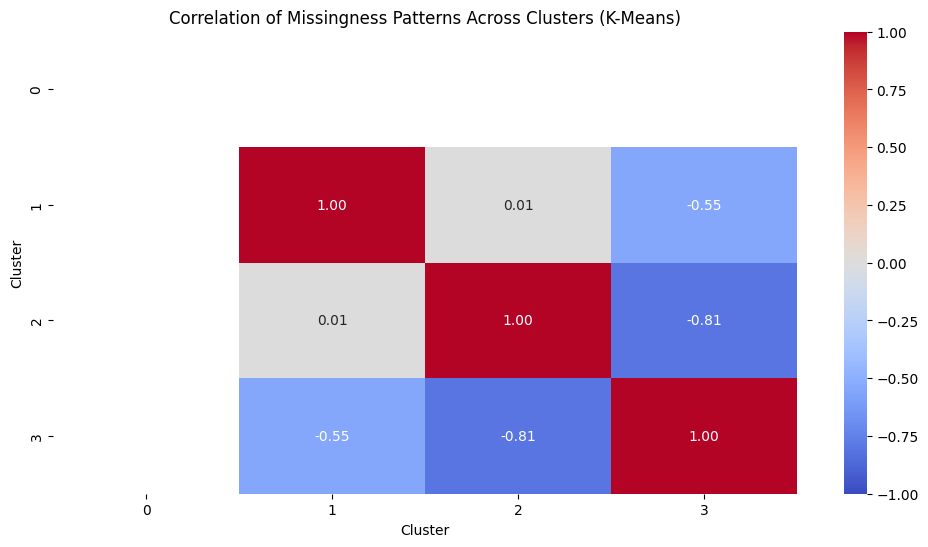

In [56]:
# Correlation between clusters
cluster_missingness_corr = kmeans_missingness_rates.T.corr()

# Plotting the heatmap of correlation of missingess across clusters
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_missingness_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation of Missingness Patterns Across Clusters (K-Means)')
plt.xlabel("Cluster")
plt.ylabel("Cluster")
plt.show()

## Self-Organizing Map (SOM)

In [57]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=032c1bb019c166bae88a6d1bcedbf4e44d7a9499346b351c78ee197235b1b228
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built MiniSom


### Training SOM

In [85]:
from minisom import MiniSom
from matplotlib.patches import Patch

# Convert missing values to binary
binary_missing = df.isnull().astype(int)

# Converts dataframe into numpy array
data = binary_missing.values

# Setting the hyperparameters
som_grid_rows = 16
som_grid_columns = 16
som_n_variables = data.shape[1]
sigma = 1.0
learning_rate = 0.5

# Define SOM
som = MiniSom(som_grid_rows, som_grid_columns, som_n_variables, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights
som.pca_weights_init(data)

# Training
som.train_random(data, 2000, verbose=True)

/usr/local/lib/python3.11/dist-packages/minisom.py:447: ComplexWarning:

Casting complex values to real discards the imaginary part



 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 0.037543927563841284


## Visualizing SOM Neurons
- Lighter shades = smaller distances, the neurons represent more similar missingness patterns.
- Darker shades = larger distances between neighboring neurons, greater dissimilarity between the data points those neurons represent


Think groups of lighter shade as clusters and the dark nodes between clusters is their boundaries.



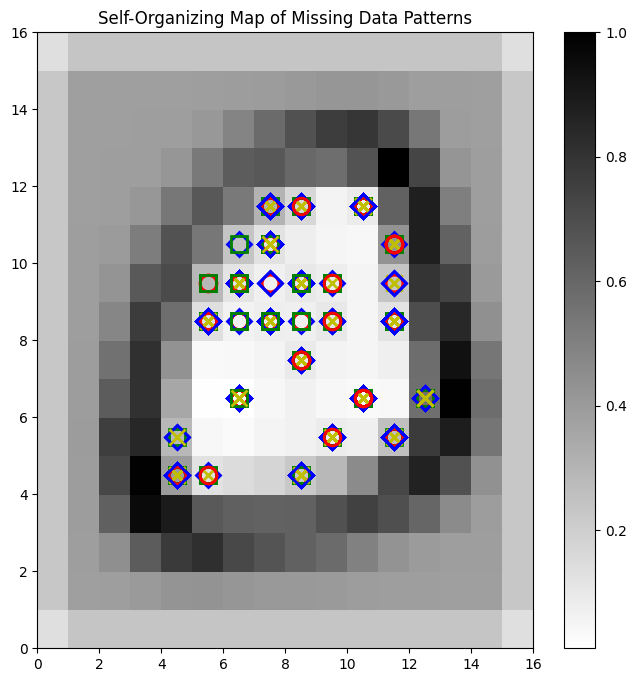

In [86]:
# Visualize SOM using distance map (U-matrix)
u_matrix = som.distance_map().T

# Plotting the distance map
plt.figure(figsize=(8, 8))
plt.pcolor(u_matrix, cmap='gist_yarg')
plt.colorbar()

markers = ['o', 's', 'D', 'x']
colors = ['r', 'g', 'b', 'y']

for i, x in enumerate(data):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[i % len(markers)],
             markerfacecolor='None', markeredgecolor=colors[i % len(colors)],
             markersize=12, markeredgewidth=2)

plt.title('Self-Organizing Map of Missing Data Patterns')
plt.show()

- SOM does not return number clusters (eg Cluster 0, 1, 2...)
- Instead, SOM gives coordinate-based BMU (eg: (3,5), (2,7)...)
- Therefore, it is required to convert the coordinates into cluster labels

In [87]:
# Getting BMU for each data point
bmu_coords = np.array([som.winner(x) for x in data])

# Mapping each unique neuron coordinate to a cluster ID
unique_bmus = {tuple(coord): i for i, coord in enumerate(np.unique(bmu_coords, axis=0))}
cluster_labels = np.array([unique_bmus[tuple(bmu)] for bmu in bmu_coords])

# Add cluster labels
missing_data_with_clusters = binary_missing.copy()
missing_data_with_clusters['SOM_Cluster'] = cluster_labels

In [88]:
# Summarising amount of missing values per cluster
cluster_summary = missing_data_with_clusters.groupby('SOM_Cluster').sum()

# Filter for only columns that contains missing values
missing_columns = df.columns[df.isnull().any()]
cluster_summary_missing_only = cluster_summary[missing_columns]

cluster_summary_missing_only

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD
SOM_Cluster,,,,,,,
0,90,0,0,0,0,0,0
1,4,0,4,0,0,0,0
2,8,8,1,1,0,0,0
3,0,0,54,0,0,0,0
4,0,0,4,0,4,0,0
5,0,0,0,0,0,0,0
6,0,0,0,6,6,0,0
7,4,0,0,0,70,0,0
8,0,2,0,0,2,0,0


### Visualizing Missingness Rates per Cluster

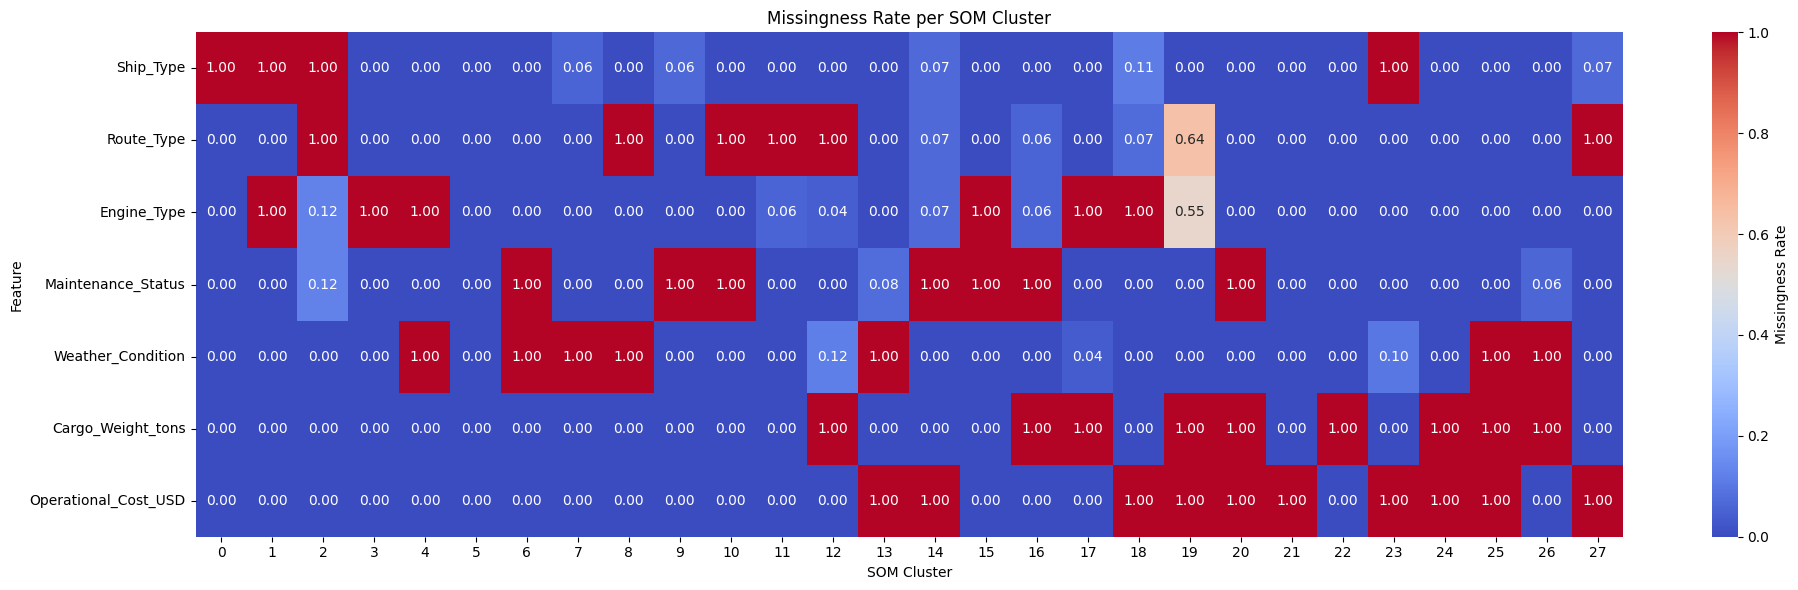

In [89]:
# Filtering for columns with missing values
missing_cols = df.columns[df.isnull().any()]

# Calculate missingness rates per cluster (for missing values only)
som_missingness_rates = missing_data_with_clusters.groupby('SOM_Cluster')[missing_cols].mean()

# Visualize missingness rates using a heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(som_missingness_rates.T, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Missingness Rate'})
plt.title("Missingness Rate per SOM Cluster")
plt.xlabel("SOM Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Visualizing Missing Data Patterns with SOM

- Using TSNE to visualize SOM cluster source:

https://www.researchgate.net/publication/361802594_Research_of_the_Distribution_of_Tongue_Features_of_Diabetic_Population_Based_on_Unsupervised_Learning_Technology/download

- Color palette source:

https://stackoverflow.com/questions/68209351/how-to-make-a-color-map-with-many-unique-colors-in-seaborn

https://colorcet.holoviz.org/user_guide/Categorical.html

<ipython-input-96-1070405adf35>:16: UserWarning:

The palette list has more values (30) than needed (28), which may not be intended.



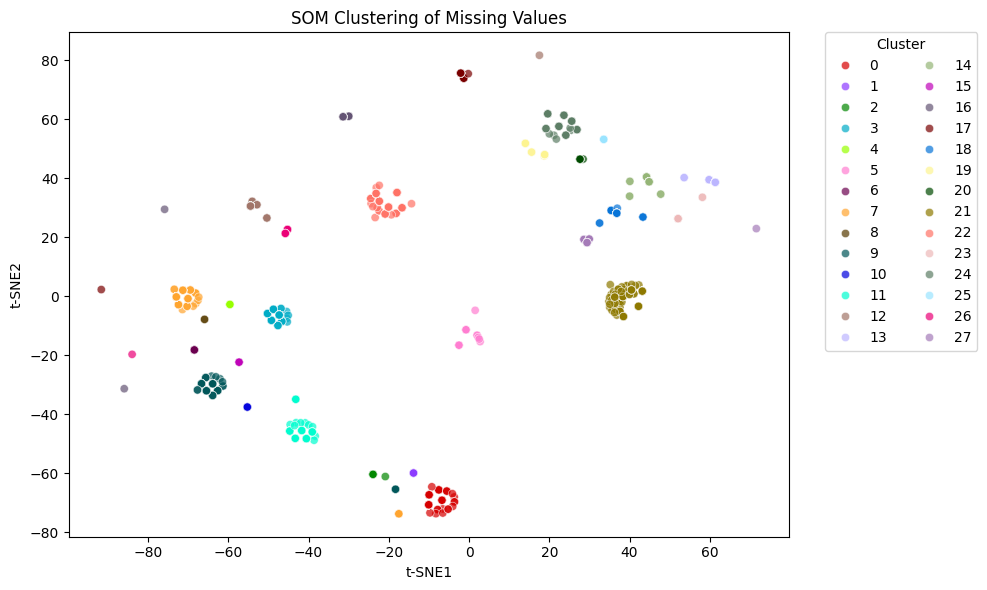

In [96]:
import colorcet as cc
from sklearn.manifold import TSNE

# Visualizing missing values using TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(data)

tsne_df_som = pd.DataFrame(tsne_results, columns=["tSNE1", "tSNE2"])
tsne_df_som["SOM_Cluster"] = cluster_labels

# Color palette that satisfies >20 clusters
palette = sns.color_palette(cc.glasbey, n_colors=30)

# Creating scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="tSNE1", y="tSNE2", hue="SOM_Cluster", data=tsne_df_som, palette=palette, alpha=0.7)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")

# Creating legend outside due to large amount of clusters
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=2)
plt.title("SOM Clustering of Missing Values")
plt.tight_layout()
plt.show()


### Interactive Visualization of Missing Data Patterns

Seaborn to Plotly conversion source:

https://josephlemaitre.com/2022/06/use-a-seaborn-color-palette-for-plotly-figures/

In [92]:
import plotly.express as px

# Visualizing missing values using TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(data)

# Convert the cluster labels to string and sorting into ascending order
cluster_labels_str = cluster_labels.astype(int).astype(str)
sorted_clusters = sorted(tsne_df_som["SOM_Cluster"].unique(), key=lambda x: int(x))

# Convert palette to HEX for Plotly
glasbey_colors_hex = [f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}'
                      for r, g, b in palette]

# Matching the cluster colors with the static TSNE visualization
color_map = {str(cluster): glasbey_colors_hex[i % len(glasbey_colors_hex)]
             for i, cluster in enumerate(sorted_clusters)}

tsne_df_som = pd.DataFrame(tsne_results, columns=["tSNE1", "tSNE2"])
tsne_df_som["SOM_Cluster"] = cluster_labels_str


# Creating interactive scatter plot
fig = px.scatter(
    tsne_df_som,
    x="tSNE1",
    y="tSNE2",
    color="SOM_Cluster",
    title="SOM Clustering of Missing Values",
    labels={"SOM_Cluster": "Cluster"},
    hover_name="SOM_Cluster",
    color_discrete_map=color_map,
    category_orders={"SOM_Cluster": sorted_clusters}
)

fig.update_layout(
    legend_title_text='Cluster',
    hovermode='closest',
    xaxis_title='t-SNE1',
    yaxis_title='t-SNE2',
    width=800,
    height=600,
)

fig.update_traces(
    marker=dict(size=8, opacity=0.8),
    selector=dict(mode='markers')
)

fig.show()

### Visualizing Correlation of Missingness Patterns Across Clusters

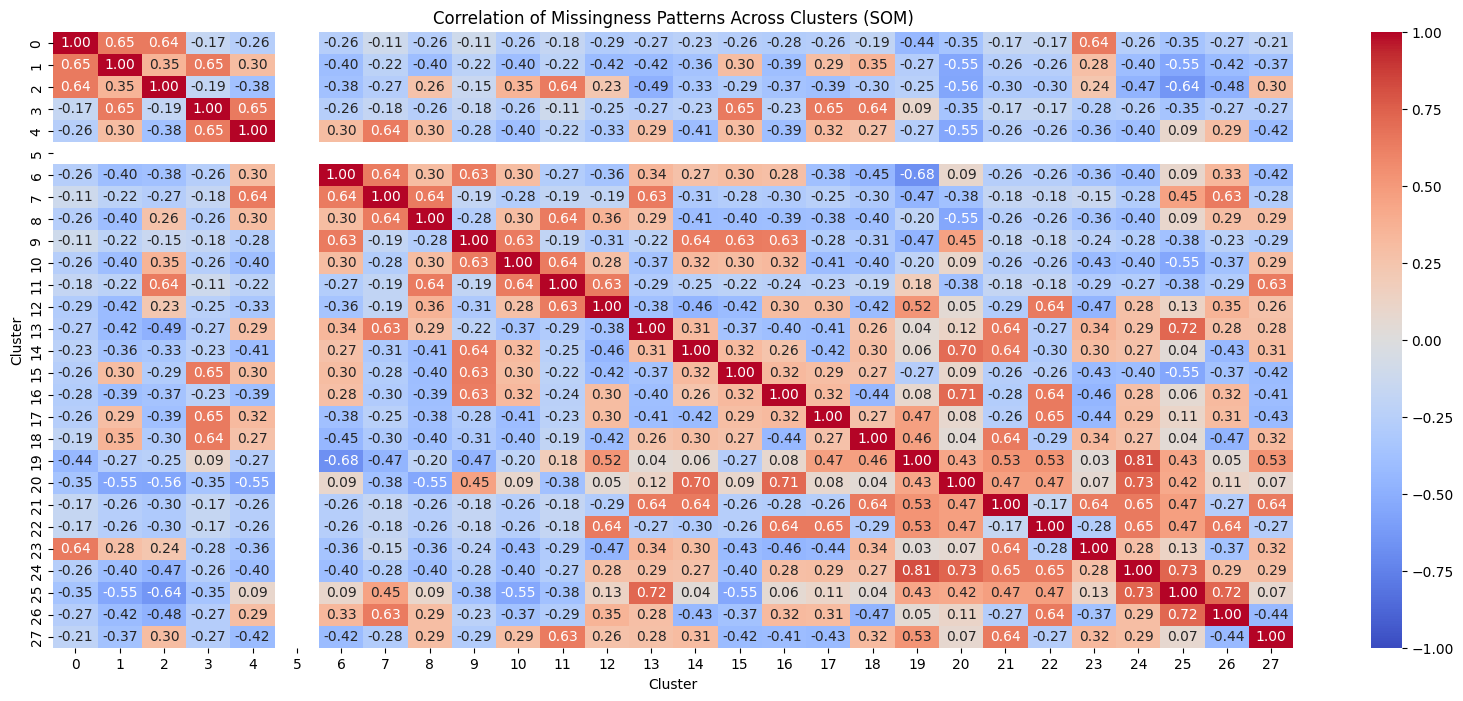

In [93]:
# Correlation between clusters
cluster_missingness_corr = som_missingness_rates.T.corr()

# Plotting the heatmap of correlation of missingess across clusters
plt.figure(figsize=(20, 8))
sns.heatmap(cluster_missingness_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation of Missingness Patterns Across Clusters (SOM)')
plt.xlabel("Cluster")
plt.ylabel("Cluster")
plt.show()

## Comparison Dashboard

### tSNE Comparison

<ipython-input-117-472e7c4c28f7>:42: UserWarning:

The palette list has more values (30) than needed (28), which may not be intended.



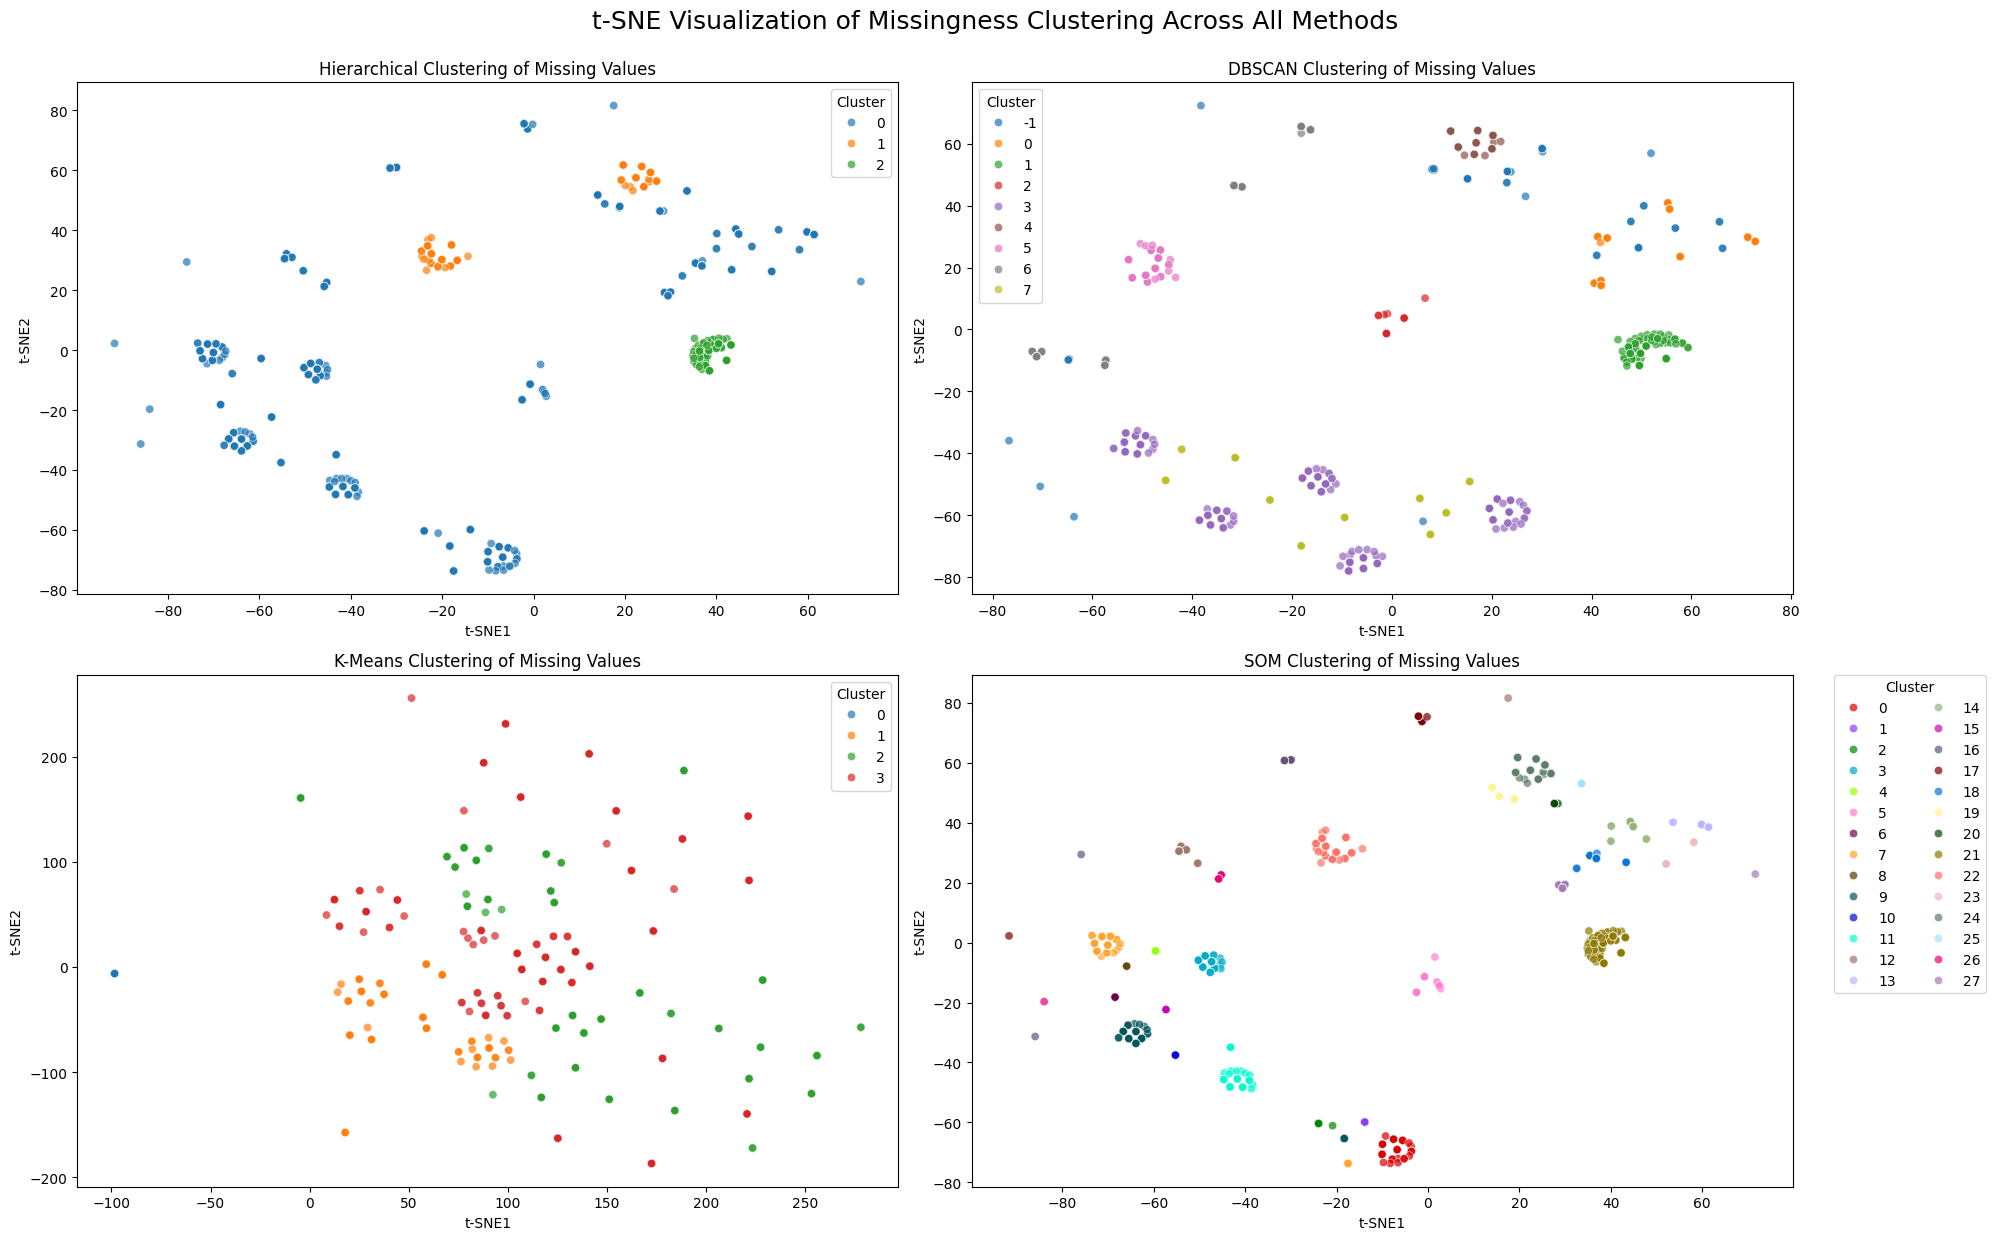

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import colorcet as cc


# Creating a 2 by 2 layout dashboard for tSNE comparison
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Hierarchical clustering
sns.scatterplot(
    x="tSNE1", y="tSNE2", hue="Hierarchical_Cluster",
    data=tsne_df_hierarchical, palette="tab10", alpha=0.7, ax=axes[0, 0]
)
axes[0, 0].set_title("Hierarchical Clustering of Missing Values")
axes[0, 0].set_xlabel("t-SNE1")
axes[0, 0].set_ylabel("t-SNE2")
axes[0, 0].legend(title="Cluster")

# DBSCAN
sns.scatterplot(
    x="tSNE1", y="tSNE2", hue="DBSCAN_Cluster",
    data=tsne_df_dbscan, palette="tab10", alpha=0.7, ax=axes[0, 1]
)
axes[0, 1].set_title("DBSCAN Clustering of Missing Values")
axes[0, 1].set_xlabel("t-SNE1")
axes[0, 1].set_ylabel("t-SNE2")
axes[0, 1].legend(title="Cluster")

# K-Means
sns.scatterplot(
    x="tSNE1", y="tSNE2", hue="KMeans_Cluster",
    data=tsne_df_kmeans, palette="tab10", alpha=0.7, ax=axes[1, 0]
)
axes[1, 0].set_title("K-Means Clustering of Missing Values")
axes[1, 0].set_xlabel("t-SNE1")
axes[1, 0].set_ylabel("t-SNE2")
axes[1, 0].legend(title="Cluster")

# SOM
palette = sns.color_palette(cc.glasbey, n_colors=30)
sns.scatterplot(
    x="tSNE1", y="tSNE2", hue="SOM_Cluster",
    data=tsne_df_som, palette=palette, alpha=0.7, ax=axes[1, 1]
)
axes[1, 1].set_title("SOM Clustering of Missing Values")
axes[1, 1].set_xlabel("t-SNE1")
axes[1, 1].set_ylabel("t-SNE2")

# Legend for SOM
axes[1, 1].legend(
    title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left',
    borderaxespad=0., ncol=2
)

plt.tight_layout()
plt.suptitle("t-SNE Visualization of Missingness Clustering Across All Methods", fontsize=18, y=1.03)
plt.show()


### Correlation comparison

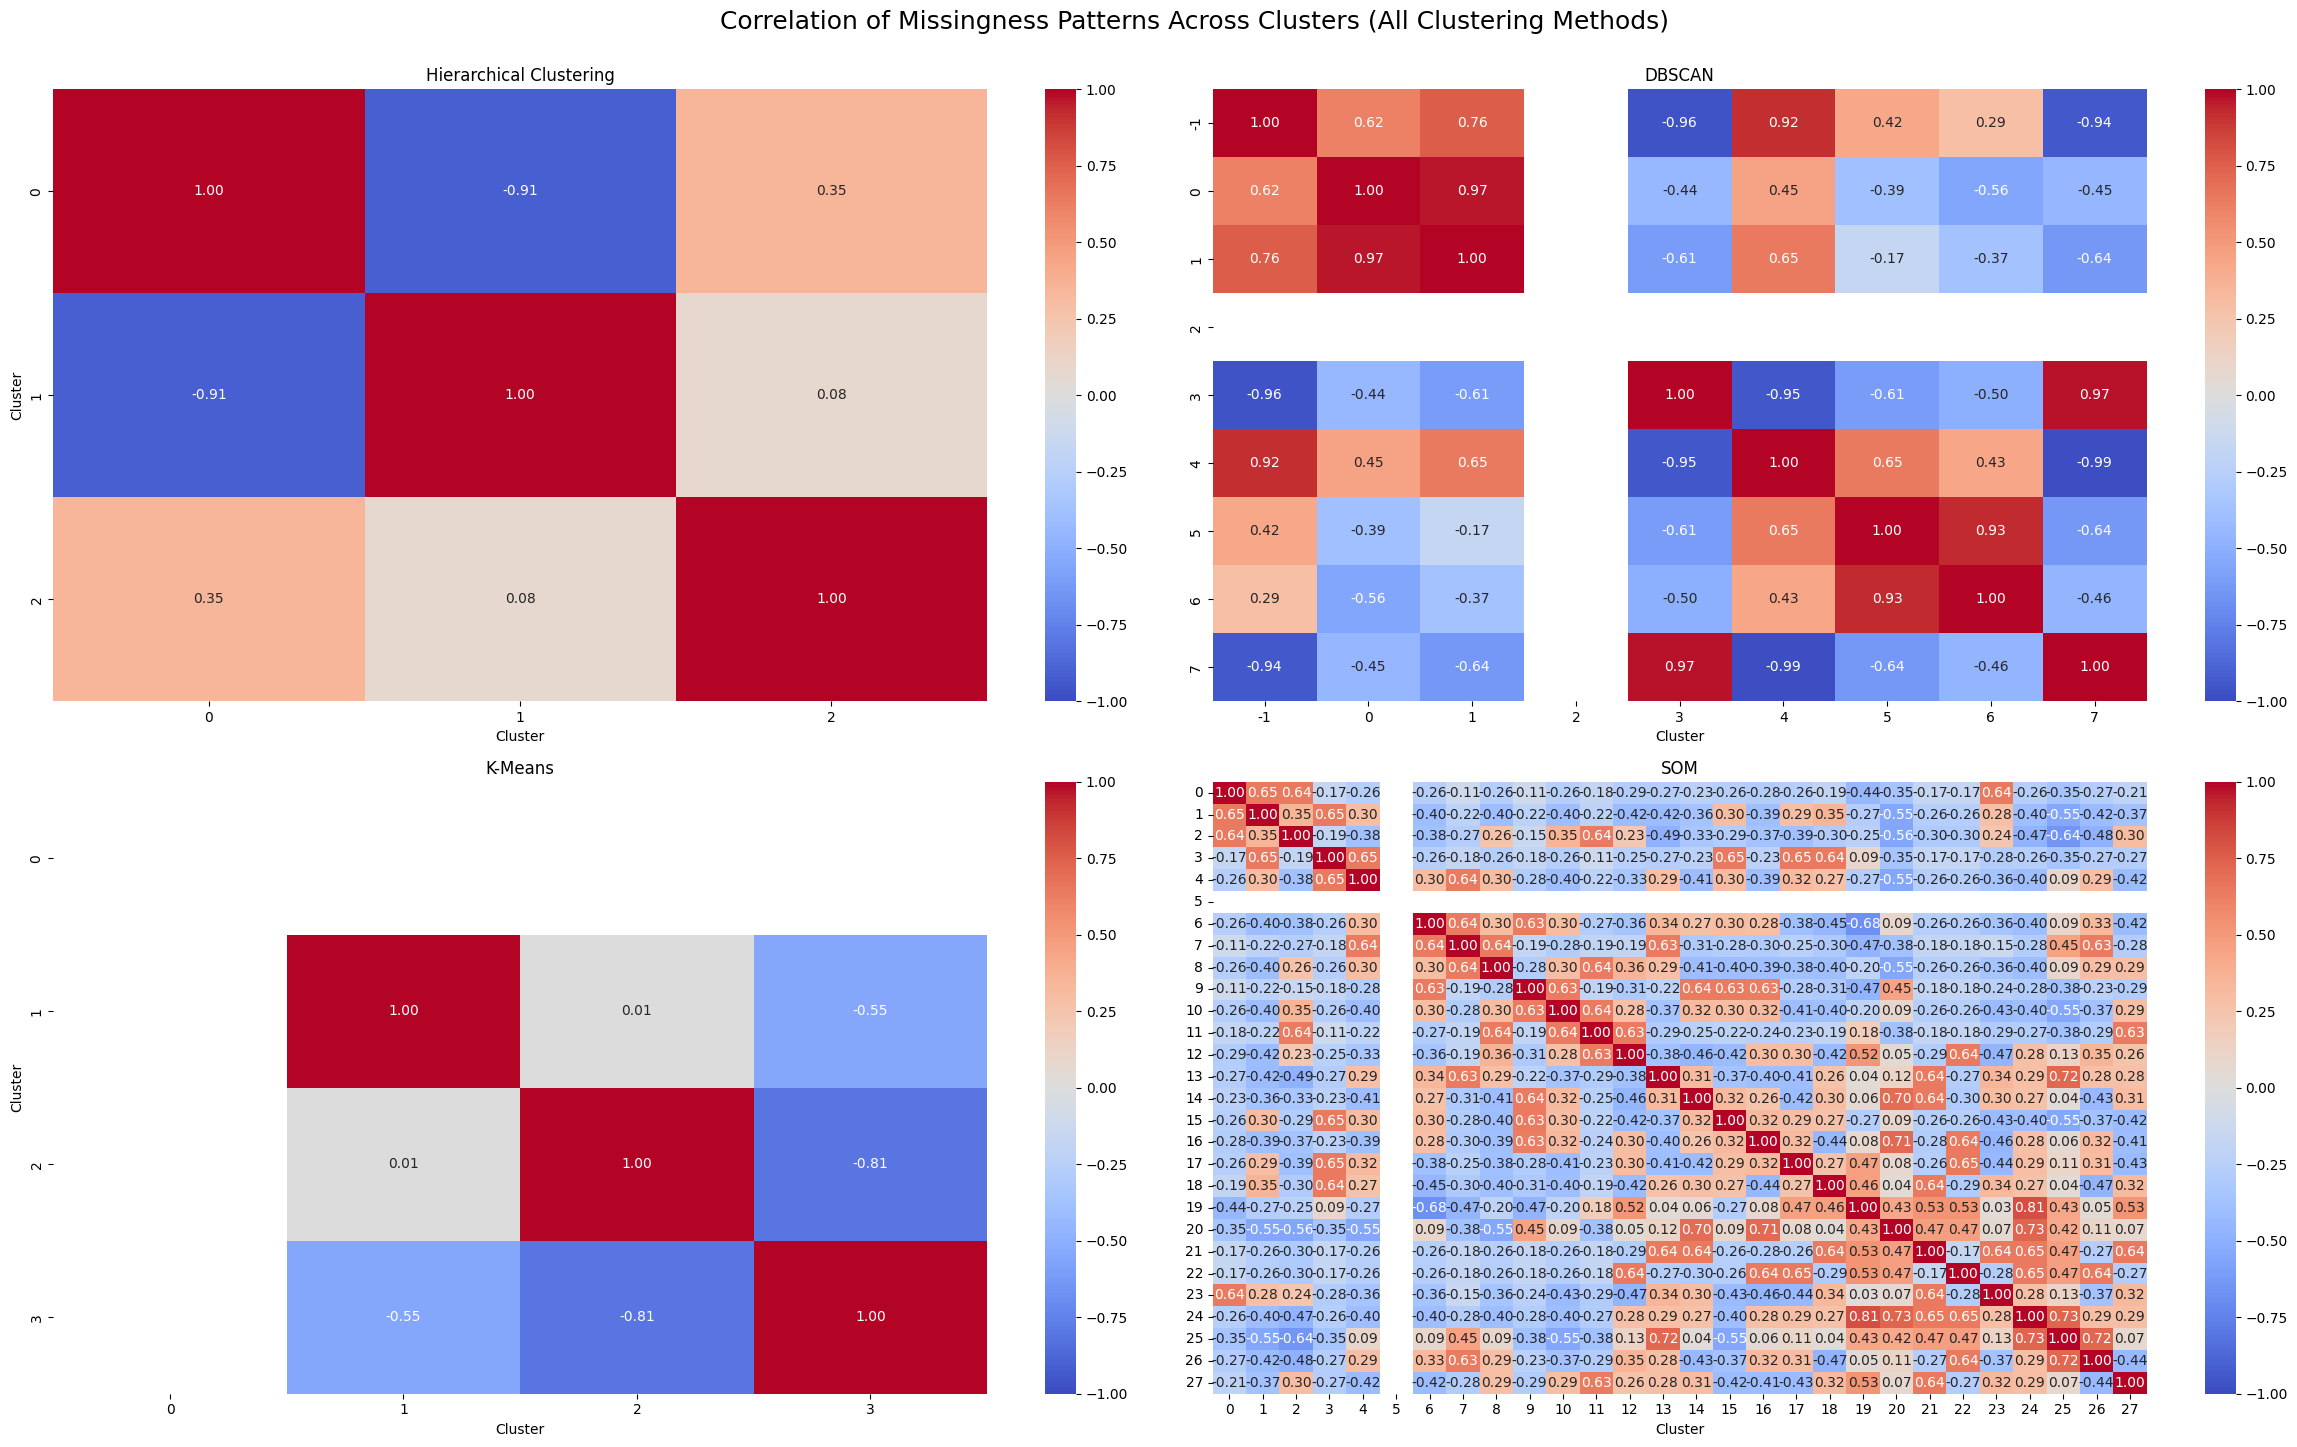

In [118]:
# Creating a 2 by 2 layout dashboard for correlation comparisons
fig, axes = plt.subplots(2, 2, figsize=(24, 14))

# Hierarchical clustering
cluster_missingness_corr = hierarchical_missingness_rates.T.corr()
sns.heatmap(cluster_missingness_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=axes[0, 0])
axes[0, 0].set_title('Hierarchical Clustering')
axes[0, 0].set_xlabel("Cluster")
axes[0, 0].set_ylabel("Cluster")

# DBSCAN
cluster_missingness_corr = dbscan_missingness_rates.T.corr()
sns.heatmap(cluster_missingness_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=axes[0, 1])
axes[0, 1].set_title('DBSCAN')
axes[0, 1].set_xlabel("Cluster")
axes[0, 1].set_ylabel("")

# K-Means
cluster_missingness_corr = kmeans_missingness_rates.T.corr()
sns.heatmap(cluster_missingness_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=axes[1, 0])
axes[1, 0].set_title('K-Means')
axes[1, 0].set_xlabel("Cluster")
axes[1, 0].set_ylabel("Cluster")

# SOM
cluster_missingness_corr = som_missingness_rates.T.corr()
sns.heatmap(cluster_missingness_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=axes[1, 1])
axes[1, 1].set_title('SOM')
axes[1, 1].set_xlabel("Cluster")
axes[1, 1].set_ylabel("")

# Layout
plt.tight_layout()
plt.suptitle('Correlation of Missingness Patterns Across Clusters (All Clustering Methods)', fontsize=18, y=1.03)
plt.show()
